# The Traveling Salesman Problem. 
       
Author: Angela Li and Janel Hernandez, for COMP 3625
Date: Nov 1st, 2021


2021-11-01 17:21:54.279250 Gen 1 Fittest -764.0999213347682 S:  [ 1. 42. 41. 49. 38. 20. 32.  6. 26.  3. 15. 18. 34. 36. 39. 21. 25. 40.
  7. 33. 16. 11. 24. 44. 43. 31. 45. 35. 19. 13. 48. 17.  8. 37.  2.  5.
 47. 46.  4. 12. 27. 28. 14. 29.  9. 10.  0. 22. 23. 30.]
2021-11-01 17:21:56.377607 Gen 2 Fittest -727.6353620849413 S:  [ 1. 42. 41. 49. 38. 20. 32.  6. 26.  3. 15. 18. 34. 36. 39. 21. 25. 40.
  7. 33. 16. 11. 24. 44. 43. 31. 45. 35. 19. 13. 48. 17.  8. 37.  2.  5.
 47. 46.  4. 12. 27. 28. 14. 29.  9. 10. 23. 22. 30.  0.]
2021-11-01 17:21:57.416538 Gen 3 Fittest -715.6326870056674 S:  [ 1. 42. 41. 49. 38. 20. 10.  6. 26.  3. 15. 18. 34. 36. 39. 21. 25. 40.
  7. 33. 16. 11. 24. 44. 43. 31. 45. 35. 19. 13. 48. 17.  8. 37.  2.  5.
 47. 46.  4. 12. 27.  0. 14. 29.  9. 32. 23. 22. 30. 28.]
2021-11-01 17:21:59.574599 Gen 4 Fittest -688.7438702275543 S:  [ 1. 42. 41. 49. 38. 20. 10.  6. 26.  3. 15. 18. 34. 36. 39. 21. 11. 40.
  7. 33. 16. 25. 24. 44. 43. 31. 45. 35. 19. 13. 48. 17.  8

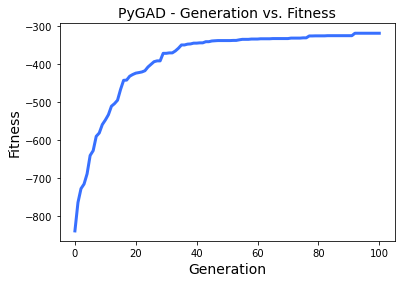

[27. 22. 20. 49.  7.  8. 17. 24. 26.  5. 45. 32. 21. 37. 39. 38. 10. 19.
 11. 13. 41. 40. 46. 29. 47. 33. 34. 35. 36. 16. 31. 14. 15. 30. 18. 48.
 43. 44. 42.  4.  1. 12. 25.  9. 23.  2.  6. 28.  3.  0.]


[27. 22. 20. 49.  7.  8. 17. 24. 26.  5. 45. 32. 21. 37. 39. 38. 10. 19.
 11. 13. 41. 40. 46. 29. 47. 33. 34. 35. 36. 16. 31. 14. 15. 30. 18. 48.
 43. 44. 42.  4.  1. 12. 25.  9. 23.  2.  6. 28.  3.  0.]



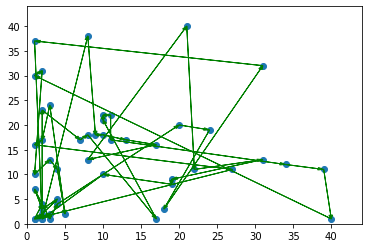

In [9]:
import pygad
import numpy 
import random
import pandas as pd
import math
from datetime import datetime
import matplotlib.pyplot as plt


tsp=pd.read_csv("C:/Users/janel/OneDrive/Desktop/tsp2.csv")

# print(tsp)

max_city_num = int(tsp[tsp.columns[0]].count()) # This find the number of rows in the DF aka the number of cities

# This generates 1 random list with a randomized solution for the city order
def solution():
    sol = random.sample(range(max_city_num), max_city_num)
    sol.append(sol[0])
    return sol

def distance( solution, solution_idx ):
    start_city = solution[0] #initializes the start point 
    end_city = solution[len(solution)-1] #the final city
    dist = math.sqrt((( tsp.loc[start_city, 'x'])**2)+((  tsp.loc[start_city, 'y'])**2)) # the distance from the origin to the first city. 

    for i in range(len(solution)-1): # calculates the distance between each of the cities. 
        src_city = solution[i]
        dis_city = solution[i+1]

        x1 = tsp.loc[src_city, 'x']
        x2 = tsp.loc[dis_city, 'x']

        y1 = tsp.loc[src_city, 'y']
        y2 = tsp.loc[dis_city, 'y']

        dist += math.sqrt(((x1-x2)**2)+((y1-y2)**2))

    dist += math.sqrt(((tsp.loc[end_city, 'x'] )**2)+((tsp.loc[end_city, 'y'] )**2)) # calculates the distance last city. 

    return -dist # returns the sum of the distances. 

# The on_generation is a function that will be called at the end of each generation. 
# In this case we will print out the gen number. 

def on_generation(g): #prints out the time stamps and the best solution per generation
    s, f, s_i = g.best_solution() 
    print(datetime.now(), "Gen", g.generations_completed, "Fittest", f, "S: ", s)


def plotTSP(paths, points, num_iters=1):

    """
    path: List of lists with the different orders in which the nodes are visited
    points: coordinates for the different nodes
    num_iters: number of paths that are in the path list
    """
    plt.scatter(x, y, marker='o')

    # Set a scale for the arrow heads 
    a_scale = float(max_city_num)/float(100)


    # Draw the primary path for the TSP problem
    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale, 
            color ='g', length_includes_head=True)
    for i in range(0,len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                color = 'g', length_includes_head = True)

    #Set axis too slitghtly larger than the set of x and y
    plt.xlim(0, max(x)*1.1)
    plt.ylim(0, max(y)*1.1)
    plt.show()


# run the ga. 
def ga(): 
    
    # assign the fitness function
    fitness_function = distance
    
    # how many generations to run for? 
    num_generations = 100

    # what is the population size? 
    sol_per_pop = 100

    # Set up the genes. How many genes make up an individual and what are the values that 
    # each gene can take on. 
    # In this example there are 8 genes, each representing a column on the chessboard, and 
    # that possible values are 1-8 for which row the queen is placed. 
  
    num_genes = max_city_num
    gene_space = range(0, max_city_num)

    # Then we need to control how the various genetic operators are applied. 
    num_parents_mating = 2
    parent_selection_type = "sss"
    keep_parents = 1

    crossover_type = "single_point"

    mutation_type = "random"
    mutation_percent_genes = 1

    ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       #init_range_low=init_range_low,
                       #init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       gene_space=gene_space,
                       on_generation=on_generation,
                       allow_duplicate_genes=False) # this is set to false, because we can not revisit cities. 
    ga_instance.run()
    
    ga_instance.plot_fitness()
    
    s, fit, s_i = ga_instance.best_solution()
    print(s)
    return s



sol = []
sol = ga()
print("\n")
print(sol)

print()

#plots the values on the graph

x = tsp['x'].values
y = tsp['y'].values

paths = sol
points = distance

plotTSP(paths, points, 1)
